# Pricing Elasticity of Demand

Let's take a look at the pricing elasticity of demand (PED) or $E_D$. The intuition behind $E_D$ is that is a measure of how sensitive demand is to price change. Typically, for a product, we can set the price $p_i$ and measure the amount of quantity $q_i$ sold, and these values form a pair $(p_i, q_i)$. If a product is sold at multiple prices, then we have multiple price-quantity pairs as follows.

- $(p_1, q_1)$ 
- $(p_2, q_2)$
- $\ldots$
- $(p_n, q_n)$ 

Plotting these pairs of points forms what is known as the `demand curve`. Below is a fake dataset of prices and quantities.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(37)

df = pd.DataFrame({
    'p': np.arange(1, 30, 1) + 1.99,
    'q': np.exp(-0.1 * np.arange(1, 30, 1)) * 100.0 
})

df

,p,q
0,2.99,90.483742
1,3.99,81.873075
2,4.99,74.081822
3,5.99,67.032005
4,6.99,60.653066
5,7.99,54.881164
6,8.99,49.658530
7,9.99,44.932896
8,10.99,40.656966
9,11.99,36.787944


We can plot this data as demand curves. The demand curve on the left plots the raw values while the demand curve on the right plots the log of the values.

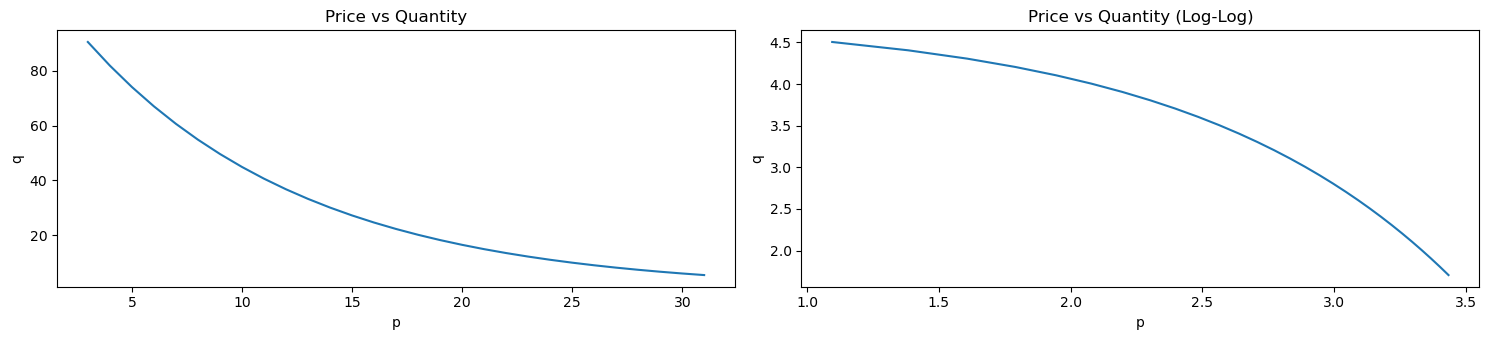

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 3.5))

df \
    .set_index(['p'])['q'] \
    .plot(kind='line', ylabel='q', title='Price vs Quantity', ax=ax[0])
np.log(df) \
    .set_index(['p'])['q'] \
    .plot(kind='line', ylabel='q', title='Price vs Quantity (Log-Log)', ax=ax[1])

fig.tight_layout()

## Elasticity

There are several ways to compute PED. One common way is defined as follows.

$E_{\langle P \rangle} = \dfrac{\Delta Q}{\Delta P}$, where

- $\Delta Q$ is the percent change in quantity (eg the quantity of demand), and
- $\Delta P$ is the percent change in price.

Notice that $\Delta Q$ and $\Delta P$ are `percent changes`, not `absolute changes`; elasticity is not the slope of the demand curve! It's more clear if we write out $E_{\langle P \rangle}$ as follows.

$E_{\langle P \rangle} = \dfrac{\dfrac{\Delta Q}{Q}}{\dfrac{\Delta P}{P}} = \dfrac{\Delta Q}{Q} \dfrac{P}{\Delta P} = \dfrac{\Delta Q}{\Delta P} \dfrac{P}{Q}$

Let's focus on $\Delta Q$, which implies a difference between two quantites, $\Delta Q = q_i - q_j$. Also, $\Delta P$ implies the difference between two prices, $\Delta P = p_i - p_j$. It should be obvious that $q_i$ is the quantity/demand associated with the price $p_i$, and likewise, $q_j$ is the quantity/demand associated with the price $p_j$.

Ok, so $\Delta Q = q_i - q_j$, so what is $Q$ then--is it $q_i$ or $q_j$? Really, $Q = q_i$, and likewise, $P = p_i$ since we are moving from the point $(p_i, q_i)$ to the other point $(p_j, q_j)$. By now, you should know that $E_{\langle P \rangle}$ is determined by two points, not a single point.

Ok, so if we are moving from a point $(p_i, q_i)$ to another point $(p_j, q_j)$ (meaning, we are changing the price from $p_i$ to $p_j$), then we can write $E_{\langle P \rangle}$ to be even more clear as follows.

$E_{\langle P \rangle} = \dfrac{\dfrac{q_i - q_j}{q_i}}{\dfrac{p_i - p_j}{p_i}} = \dfrac{q_i - q_j}{q_i} \dfrac{p_i}{p_i - p_j} = \dfrac{q_i - q_j}{p_i - p_j} \dfrac{p_i}{q_i}$

If instead we are going from $(p_j, q_j)$ to $(p_i, q_i)$, then $E_D$ will be written out as follows.

$E_{\langle P \rangle} = \dfrac{\dfrac{q_j - q_i}{q_j}}{\dfrac{p_j - p_i}{p_j}} = \dfrac{q_j - q_i}{q_j} \dfrac{p_j}{p_j - p_i} = \dfrac{q_j - q_i}{p_j - p_i} \dfrac{p_j}{q_j}$

In general, we can go from any point to another (both points have to be on the demand curve, obviously) and compute $E_{\langle P \rangle}$ with respect to the starting point. Note that $E_{\langle P \rangle}^{ij}$ (going from point $i$ to point $j$) is different from $E_{\langle P \rangle}^{ji}$ (going from point $j$ to point $i$). Additionally, even if the demand curve is linear, $E_{\langle P \rangle}^{ij} \neq E_{\langle P \rangle}^{ji}$.

Generally speaking, no matter how we compute or define PED, its value is typically negative, $E_D \leq 0$, but the interpretation of $E_D$ is based on its absolute value.

- $E_D = 0$ means perfectly inelastic,
- $0 < E_D < 1$ means relatively inelastic,
- $E_D = 1$ means unit elastic,
- $E_D > 1$ means relatively elastic, and
- $E_D = \infty$ means perfectly elastic.

Let's compute $E_{\langle P \rangle}$ for all pairs of points on the demand curve above.

In [3]:
import itertools

def compute_elasticity(p_i, p_j, q_i, q_j):
    a = (q_i - q_j) / (p_i - p_j)
    b = p_i / q_j 
    
    return a * b

p2q = {np.log(r['p']): np.log(r['q']) for _, r in df.iterrows()}

price_pairs = np.log(df['p'].values)
price_pairs = itertools.product(price_pairs, price_pairs)
price_pairs = filter(lambda tup: tup[0] != tup[1], price_pairs)
price_pairs = list(price_pairs)

ped_df = pd.DataFrame([(p_i, p_j, p2q[p_i], p2q[p_j], compute_elasticity(p_i, p_j, p2q[p_i], p2q[p_j])) 
                       for p_i, p_j in price_pairs], columns=['p_i', 'p_j', 'q_i', 'q_j', 'ped'])

Let's visualize $E_D$ for all the pairs of points on the demand curve. Note that the size of the circle correlates with $|E_D^{ij}|$ and the color of the cirlce is red if $|E_D^{ij}| < 1$ and blue if $|E_D^{ij}| > 1$.

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


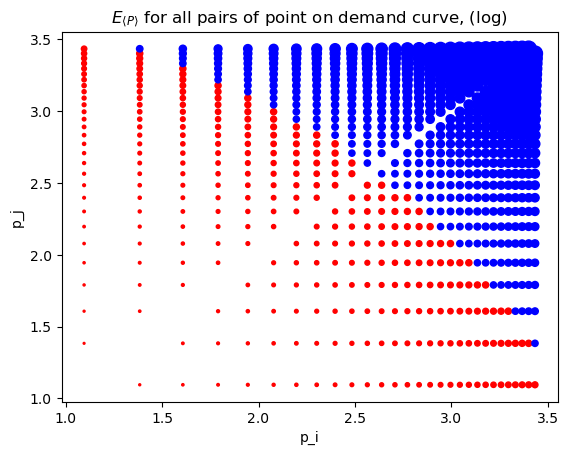

In [4]:
_ = ped_df.assign(s=lambda d: np.abs(d['ped']) * 20) \
    .plot(
        kind='scatter', 
        x='p_i', y='p_j', s='s', 
        color=np.abs(ped_df['ped']).apply(lambda v: 'r' if v < 1 else 'b'),
        title=r'$E_{\langle P \rangle}$ for all pairs of point on demand curve, (log)'
    )

To emphasize the point that $E_{\langle P \rangle}^{ij} \neq E_{\langle P \rangle}^{ji}$, look at the following where we go from 

- (1.095273, 4.50517) to (1.383791, 4.40517), $E_{\langle P \rangle}^{ij}=-0.086176$, and then in reverse from 
- (1.383791, 4.40517) to (1.095273, 4.50517), $E_{\langle P \rangle}^{ji}=-0.106460$.

This asymmetry is an example of the [index number problem](https://en.wikipedia.org/wiki/Index_(economics)#Index_number_problem).

In [5]:
ped_df.iloc[[0, df.shape[0] - 1]]

,p_i,p_j,q_i,q_j,ped
0,1.095273,1.383791,4.50517,4.40517,-0.086176
28,1.383791,1.095273,4.40517,4.50517,-0.106460


## Arc elasticity

There is another way to compute $E_D$ known as `arc elasticity` and this approach is invariant to the ordering of the points on the demand curve. Arc elasticity is defined as follows.

$E_d = \dfrac{p_i + p_j}{q_i + q_j} \times \dfrac{\Delta Q}{\Delta P}$, where

- $\Delta Q = q_i - q_j$, and
- $\Delta P = p_i - p_j$, as before.

In [6]:
def compute_arc_elasticity(p_i, p_j, q_i, q_j):
    a = (p_i + p_j) / (q_i + q_j)
    b = (q_i - q_j) / (p_i - p_j)
    
    return a * b

arc_df = pd.DataFrame([(p_i, p_j, p2q[p_i], p2q[p_j], compute_arc_elasticity(p_i, p_j, p2q[p_i], p2q[p_j])) 
                       for p_i, p_j in price_pairs], columns=['p_i', 'p_j', 'q_i', 'q_j', 'ped'])

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


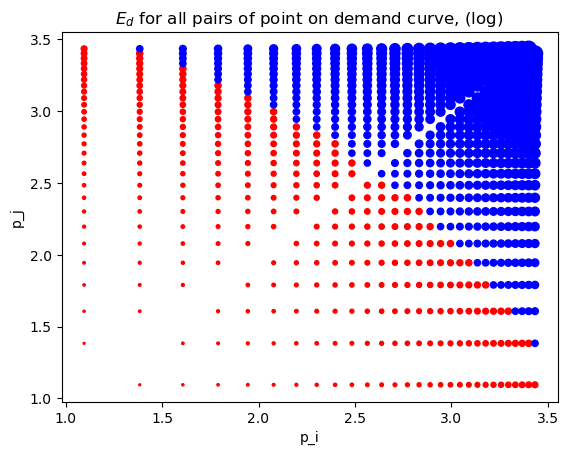

In [7]:
_ = arc_df.assign(s=lambda d: np.abs(d['ped']) * 20) \
    .plot(
        kind='scatter', 
        x='p_i', y='p_j', s='s', 
        color=np.abs(ped_df['ped']).apply(lambda v: 'r' if v < 1 else 'b'),
        title=r'$E_d$ for all pairs of point on demand curve, (log)'
    )

You can see that arc elasticity is invariant to the order of the points. Additionally, the $E_d$ is the average of the corresponding $E_{\langle P \rangle}^{ij}$ and $E_{\langle P \rangle}^{ji}$.

In [8]:
ped_df.iloc[[0, df.shape[0] - 1]]['ped'].mean()

-0.09631811146031723

In [9]:
arc_df.iloc[[0, df.shape[0] - 1]]

,p_i,p_j,q_i,q_j,ped
0,1.095273,1.383791,4.50517,4.40517,-0.096432
28,1.383791,1.095273,4.40517,4.50517,-0.096432


## Point elasticity

Point elasticity does NOT require two points. It is defined at a single point using the price, quantity and slope of the tangent line to that point. Point elasticity is defined as follows.

$E_p = \dfrac{\mathrm{d}q}{\mathrm{d}p} \times \dfrac{p_i}{q_i}$

If the demand curve is linear, then we can use linear regression to estimate $\dfrac{\mathrm{d}q}{\mathrm{d}p}$. The regression will have the following functional form

$Q \sim \beta_0 + \beta_1 P + \epsilon$, where

$\dfrac{\mathrm{d}q}{\mathrm{d}p} = \beta_1$. In the regression below, $\beta_1 = -0.95402491$.

In [10]:
from sklearn.linear_model import LinearRegression

Xy = np.log(df)
X = Xy[['p']]
y = Xy['q']

m = LinearRegression()
m.fit(X, y)

m.intercept_, m.coef_

(6.49483055957322, array([-1.27045807]))

Now we can compute $E_p$ for each point.

In [11]:
pnt_df = np.log(df).assign(slope=m.coef_[0], ped=lambda d: d['slope'] * d['p'] / d['q'])
pnt_df

,p,q,slope,ped
0,1.095273,4.50517,-1.270458,-0.308867
1,1.383791,4.40517,-1.270458,-0.399088
2,1.607436,4.30517,-1.270458,-0.474355
3,1.790091,4.20517,-1.270458,-0.540819
4,1.944481,4.10517,-1.270458,-0.601773
5,2.078191,4.00517,-1.270458,-0.659211
6,2.196113,3.90517,-1.270458,-0.714455
7,2.301585,3.80517,-1.270458,-0.768446
8,2.396986,3.70517,-1.270458,-0.821897
9,2.484073,3.60517,-1.270458,-0.875385


The optimal price is the one associated with the point elasticity equal to 1, $E_d = 1$ (the inflection point at which elasticity goes from inelastic to elastic). The following shows the optimal price.

In [12]:
s = pnt_df \
    .assign(diff=lambda d: np.abs(d['ped'] + 1)) \
    .sort_values(['diff']) \
    .drop(columns=['diff']) \
    .iloc[0]

p_opt = np.exp(s.p)
q_opt = np.exp(s.q)
e_opt = s.ped

pd.Series([
    p_opt,
    q_opt,
    e_opt
], index=['price', 'quantity', 'ped'])

price       13.990000
quantity    30.119421
ped         -0.984357
dtype: float64

Here, we plot $E_p$ versus $p$.

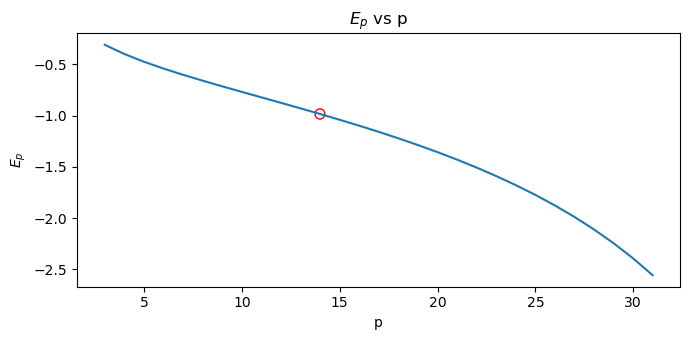

In [13]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(7, 3.5))

pnt_df \
    .assign(p=lambda d: np.exp(d['p'])) \
    .set_index(['p'])['ped'] \
    .plot(kind='line', ylabel=r'$E_p$', title=rf'$E_p$ vs p', ax=ax)

ax.add_artist(Ellipse(
    (p_opt, e_opt), 
    width=0.5, 
    height=0.1, 
    color='red', 
    fill=False, 
    clip_on=False
))


fig.tight_layout()

## Marginal revenue

Marginal revenue is related to point elasticity as follows.

$R' = P \left( 1 + \dfrac{1}{E_d} \right)$

There are 2 things to note in the plot below.

- Demand is elastic where marginal revenue is positive.
- Demand is inelastic where marginal revenue is negative.

<Axes: xlabel='p'>

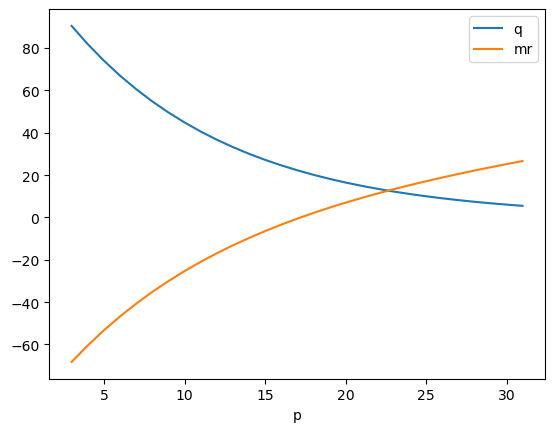

In [37]:
pnt_df \
    .assign(
        p=lambda d: np.exp(d['p']),
        q=lambda d: np.exp(d['q']),
        ped=lambda d: d['slope'] * (d['p'] / d['q']),
        mr=lambda d: d['p'] * (1 + (1 / d['ped']))
    ) \
    .set_index(['p'])[['q', "mr"]].plot(kind='line')